In [123]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [143]:
basePath = os.getcwd()
trainPath = os.path.join(basePath, "train.csv")
testPath = os.path.join(basePath, "test.csv")

train_data = pd.read_csv(trainPath)
test_data = pd.read_csv(testPath)
train_data.info()     # 显示DataFrames的信息


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [55]:
train_data.head(20)    # 显示前 20 行数据

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


通过分析上述信息可以得知，在训练集中，属性 ***Age*,*Cabin*,*Embarked*** 所在的列存在空值，在数据预处理阶段需要先对空值进行处理。对空值进行处理的方式可以分为以下几种：
1. 如果数据集很大，而且含空值的列很少，可以丢弃含空值的列
2. 如果该属性值对于模型的学习来说不是很重要，可以用该列的众数或者均值填充
3. 对于标称属性，可以赋一个代表缺失的值，如‘U0’。因为缺失本身也可能代表一些隐含信息。

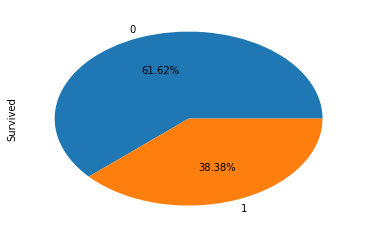

In [16]:
train_data['Survived'].value_counts().plot.pie(autopct = "%1.2f%%")    # 显示生还的比例

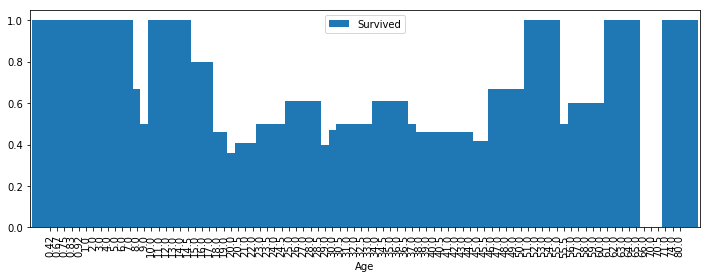

In [161]:
fig = plt.figure(figsize = (12, 4))
axes = []

train_data[['Age', 'Survived']][~train_data['Age'].isnull()].groupby('Age').mean().plot.bar(width = 5,figsize=(12,4))
# print(sorted(train_data['Age']))


In [61]:
train_data_modified = train_data.copy()        # 拷贝一份数据，以免破坏原数据
train_data_modified['Age'][train_data['Age'].isnull()] = train_data["Age"].mode().values  # 用众数填充Age的空缺值


In [135]:
train_data["Age"].astype('int32')

ValueError: Cannot convert non-finite values (NA or inf) to integer